<!--start-block-->
<hr style="height: 1px;">
<i>This code was authored by the 8.S50x Course Team, Copyright 2021 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

# LECTURE 2

Let's go through the details of the class here  
[What is a mesurement](https://www.dropbox.com/s/mfg65mk784l2uja/PCH_Lecture1_8S50.pdf?dl=0) 

<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 2.1 Binomial distributions

<img src="https://external-preview.redd.it/Kt_QUdsFmAI4v9hPw-JbYA2wC9blaF8iIvnVdla2aaE.jpg?auto=webp&s=da7915bb8a27e47d88adaf6f58bab193b7d1f35f" width="500"/>

Often we perform measurements having some probability. Lets say we perform many measurements each with the same probability. What will be our distribtuion?  Since this is a physics class, we will not go into the depth of the math behind this, but lets at least walk through a basic derivation.

<!--start-block-->

Lets say you flip a coin 10 times and the probability of heads is $p$. Lets say 3 times you get a heads distribtuion. That means the other 7 times you got a tails distribtuion.  
* What are the number of different cases there are 3 heads?

In this case we have 3 heads out of 10 flips so we have have $_{10}C_{3}=\frac{10!}{3!7!}=120$ [details](https://en.wikipedia.org/wiki/Combination). As a brief reminder of how this works, there are $10!$ different ordered combinations of numbers 1 through 10. Lets say we identify 3 of those 10 digits as special for whatever reason (e.g. lets take the first 3 digis). Then there are $3!$ ways to order these digits (e.g. (1,2,3),(1,3,2),....) and there are $7!$ ways to order the remaining 7 digits. As a consquence for all 10 digits, there are $_{10}C_{3}$ different ways to order a group of 3, and 7 digits combined where the 3 and 7 digits are distinct from one another (ie 1,2,3 is heads and 4...10 is tails). More generally, we have for $n$ flips and $m$ cases the total number of combinations will be written as $\frac{n!}{m!(n-m)!}$. 

* What is the probability of this scenario?

 * Each flip of the coin has equal probability giving heads. Lets say that this probability is $p$. To get one head and one tail in two flips  the probability would be the multaplicative probability to get a head  ($p$) and a tails ($(1-p)$) then $\times$ the number of distinct combinations that would give you a heads and a tails. In this case, the number of combinations is $2$, a heads first and a tails second, *or* a tails frist and a heads second. This yies a total probability of $p(1-p)\times N_{combo}=2p(1-p)$.

 * In this case, the probability is the probability of 3 heads $p^{3}$ and the probability of 7 no heads $(1-p)^{7}$ and for $n$ flips and $m$ cases we have $p^{m}(1-p)^{n}\times N_{combo}$. 

* What is the distribution?
 * If we combine everything for our specific case, we have $_{10}C_{3}\times p^3(1-p)^7$ 
 * Putting everything together we have the binomial distribution as a function of $p$ given by $f(m)=p^{m}(1-p)^{n}\frac{n!}{m!(n-m)!}$

Lets actually compute this for a few cases?

In [2]:
import numpy as np
from scipy.special import comb
print("Test comb:",comb(2,1),"True: 2",comb(3,2),"True: 3",comb(10,3),"True: 120")

#for p=0.5, what is the probabiity of 3 heads out of 10 draws?
def prob(p=0.5,nheads=3,ntotal=10):
    pheads=np.power(p,nheads)
    ptails=np.power(p,ntotal-nheads)
    combos=comb(ntotal,nheads)
    return combos*ptails*pheads

print("Probability of 3 heads in 10 draws is:",prob())
#Question, plot the probability of 3 heads out of 10 for varying probability value, why is the shape like that?

Test comb: 2.0 True: 2 3.0 True: 3 120.0 True: 120
Probability of 3 heads in 10 draws is: 0.1171875


Out of all of this math, we have derived the binomial distribtuion. This is the first emperical distribtuion we will need for this class. In fact, all of the other distribtuions we will study are built upon the binomial distribtuion. Lets compute the expectation and variance of this distribtuion, first we can define the distribtuion.
\begin{equation}
f(p,n,m) = \frac{n!}{m!(n-m)!}p^{m}(1-p)^{n-m}\\
\end{equation}
Now lets compute the expectaion over $m$ for $p$ and $n$ fixed, defined as $E[m;p,n]$ the semicolon denotes fixed. 
\begin{equation}
E[m;p,n]=\int_0^{n} p^{m}(1-p)^{n}\frac{n!}{m!(n-m)!} \rm{heads}(m) dm \\
\end{equation}
Where $\rm{heads}(m)$ is a function that we define as the expected value given a heads or tails observation. In this case, we will define this function as $1$ for heads and $0$ for tails. This is a complicated form, but in the case of just just choosing, one head we have. 
\begin{equation}
E[m;p,n=1]= p\times1+(1-p)\times0\\
E[m;p,n=1]= p
\end{equation} 

Now lets introduce a new function that is defined as the sum of $n$ individual experiments, we can define the function $f(x)=\sum_{i} \rm{heads}(x_{i})$. The expectation for this is
\begin{eqnarray}
E[f(x)]&=&\sum_{0}^{n} p\times 1+(1-p)\times 0 \\
E[f(x)]&=&np\\
\end{eqnarray}
That means the average value over $n$ tries $\bar{x}=f(x)/n=p$ or its just the value $p$. 

In a similar way we can defin the variance as: 
\begin{eqnarray}
V[f(x)]&=&\sum_{i=0}^{n} (x-\mu)^2 \\
V[f(x)]&=&\sum_{i=0}^{n} p\times(1-\mu)^2 + (1-p) \times (0-\mu)^2 \\
V[f(x)]&=&\sum_{i=0}^{n} p \times (1-p)^2 + (1-p) \times (0-p)^2 \\
V[f(x)]&=&\sum_{i=0}^{n} (1-p)\times (p^2 +p(1-p))  \\
V[f(x)]&=&\sum_{i=0}^{n} (1-p)\times p   \\
V[f(x)]&=&np(1-p)
\end{eqnarray}
or in other words, we consider performing $n$ independent measurements, we can compute the variance over this distribution as $Var(f(x)/n)=p(1-p)$

Its all fun to do math, but the point of this class is to do it with computers, so lets do the same derivations numerically. 


norm: 0.9999999999999942 expectation: 7.5 Var: 5.625000000000005
norm: 1.000000, expectation: 7.5 Var: 5.625


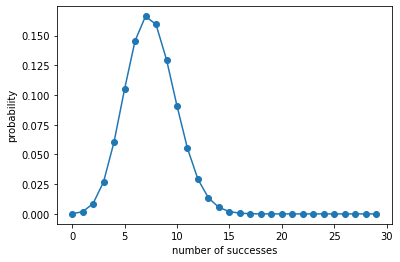

In [3]:
#We are going to use scipy stats package
import scipy.stats as stats
import matplotlib.pyplot as plt
n=30
p=0.25
#Scipy has a binomial, to get the pdf inference we do pmf
k=np.arange(0,n)
binomial=stats.binom.pmf(k,n,p)
#lets get the integral of this guy
norm=0
exp=0
var=0
for i0 in range(n):
    norm+=stats.binom.pmf(i0,n,p)
    exp+=i0*stats.binom.pmf(i0,n,p)
for i0 in range(n):
    pVal=stats.binom.pmf(i0,n,p)
    var+=(i0-exp/norm)*(i0-exp/norm)*pVal

#Print it out
print("norm:",norm,"expectation:",exp/norm,"Var:",var/norm)
#Now lets check with the expectation
print("norm: 1.000000, expectation:",n*p,"Var:",n*p*(1-p))

plt.plot(k,binomial,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()

Now, lets actually do some more difficult problems that flipping a coin. Also, lets actually think about this in a real life setting. Lets say that you are observing [fast radio bursts](https://en.wikipedia.org/wiki/Fast_radio_burst), and based on the wikipedia page [here](https://en.wikipedia.org/wiki/List_of_fast_radio_bursts) you observe about 19 fast radio bursts per year. What is the probability that you observe 2 Fast radio bursts (FRB) within a day of each other? 

The trick to this problem is think of each day as flipping a coin. Where the probability of heads is instead the probability of finding a FRB. We can caculate the average probability by noting that over a period 365 days (ie 365 experiments), we see $19$ FRBs, or in other words:
\begin{eqnarray}
E[f(x;n=365)]&=&np \\
             &=&19 \\
             &=&365\times p \\
            p&=&\frac{19}{365}
\end{eqnarray}
So the probability of $2$ in a row is just 7(see below). Moreover the probability of 2 observations in 7 days is (see below)

In [4]:
def prob(ndays=2,nobs=2,p=19/365):
    return stats.binom.pmf(nobs,ndays,p)
print("2 observations in 2 days:",prob())
print("2 observations in 7 days:",prob(7))
print("19 observations in 365 days:",prob(365,19))

2 observations in 2 days: 0.0027097016325764675
2 observations in 7 days: 0.043556897644653154
19 observations in 365 days: 0.0935904593189389


Now, lets ask the important physics question. Let's say you observed 2 FRBs back to back, given the probability of this occurance is so rare, is something else happening in the universe? [Read here](https://en.wikipedia.org/wiki/Fast_radio_burst#FRB_201124)

Secondly, why is the probability of 19 observations in 365 days so low? (only 10%). To understand this let's make a plot. 

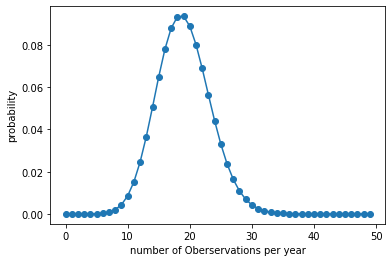

In [5]:
p=19/365
n=365
k=np.arange(0,50)
binomial=stats.binom.pmf(k,n,p)

plt.plot(k,binomial,'o-')
plt.xlabel("number of Oberservations per year")
plt.ylabel("probability")
plt.show()

getting exatly 19 observations is unlikely because their is variation. What we really to do is integrate the number of observations that are either greater or less than 19. This is the cumlative distribtuion function. 
\begin{equation}
\rm{cdf}(\rm{binomial}(x)) = \int_x^{\infty} \rm{binomial}(u;p,k) du 
\end{equation}
the nice thing is that this is all built into our statistics code, lets plot it. 

cdf at 19: 0.5606290918166824


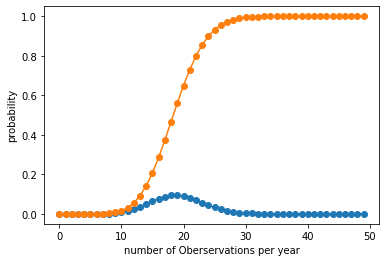

NameError: name 'average' is not defined

In [6]:
p=19/365
n=365
k=np.arange(0,50)
binomial=stats.binom.pmf(k,n,p)
binomialcdf=stats.binom.cdf(k,n,p)
print("cdf at 19:",stats.binom.cdf(19,n,p))
plt.plot(k,binomial,'o-')
plt.plot(k,binomialcdf,'o-')
plt.xlabel("number of Oberservations per year")
plt.ylabel("probability")
plt.show()
mean     = np.average(k, weights=binomial)
variance = np.average((k-average)**2, weights=binomial)
print("mean:",mean,"stddev:",np.sqrt(variance))


So now we see clearly the CDF is at approximately 50%. Its  exactly 50% for the simple fact that this is a discrete distribution. However the expectatoin wil be at exactly 19. 

### Challenge question
Lets do another related problem. With the current rate of Gravitataional wave (GW) detection we observe a GW once per week. What is probability of 3 or more graviational waves in one week? Plot the distribution. Additionally, what is the distribution for GW events over the whole year, and the mean and variance? 

binomial: 0.06522913800493721


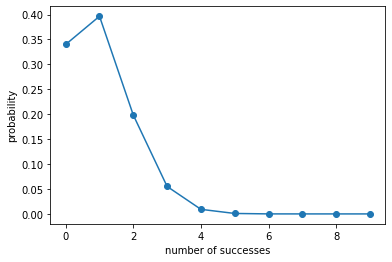

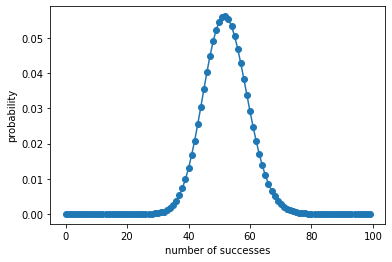

mean: 52.14285708708643 stddev: 7.090882143841801


In [7]:
#solution
n=7.
p=1./7.
k=np.arange(0,10)
binomial=stats.binom.pmf(k,n,p)
total1=0
for i0 in range(len(k)):
    if k[i0] > 2:
        total1+= binomial[i0]
print("binomial:",total1)
plt.plot(k,binomial,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()

#now what about for GWs in a year
n=365*4. #we don't need to divide by day!
p=1/28.
k=np.arange(0,100)
binomial=stats.binom.pmf(k,n,p)
plt.plot(k,binomial,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()
average  = np.average(k, weights=binomial)
variance = np.average((k-average)**2, weights=binomial)
print("mean:",average,"stddev:",np.sqrt(variance))


<!--start-block-->
<hr style="height: 1px;">

## 2.2 Poisson distribution

The ugly thing about the binomial distrivbtuion is that it has these damn factorials. One way to get rid of the factorials is to do an approximation of the binomial distribtuion. We can dfine this by taking a limit over the number of experiments going to infinity $n\rightarrow\infty$. To do this we
\begin{equation}
{\rm define~} \lambda = \lim_{n\rightarrow\infty} np \rightarrow p=\frac{\lambda}{n} \\
\end{equation}

Now in this limiting case, we can replace the binomial distribtuion with an approximate form that has no factorials:
\begin{eqnarray}
\lim_{n\rightarrow\infty}\frac{n!}{m!(n-m)!}p^{m}(1-p)^{n} & = & \frac{n(n-1)...(n-m)}{m!}\left(\frac{\lambda}{n}\right)^{m}\left(1-\frac{\lambda}{n}\right)^{n} \\
&\approx&\frac{n^m}{m!}\frac{\lambda^{m}}{n^{m}}\left(1-\frac{\lambda}{n}\right)^{n} \\
&\approx&\frac{\lambda^{m}}{m!}e^{-\lambda} \\
f(m;\lambda=np) & = & \frac{\lambda^{m}}{m!}e^{-\lambda}
\end{eqnarray}
This form is known as the poisson distribution, and is achieved by taking the binomial distribution to the large $n$ limit. We still have a pesky factorial, but one factorial is better than three factorials. 

Since, we can treat the poisson distributoin just like the binomail distribtuion. We can use the above computations for the mean and variance of $n\rightarrow\infty$ experiments sampling a poission distribution as (noting $p\rightarrow0$ in the large $n$ limit)
\begin{equation}
E[f(x)]=\lambda \\
V[f(x)]=\lambda
\end{equation}
What is most important from this observation is that the standard deviation of the distribution goes as the $\sqrt{\lambda}$ or root of the mean of the distribution. This will play a critical role going forward. 

Now lets see how it compares to a binomial in our previous plots. Lets use our FRB example $p=19/365$. Alternatively, lets also consider the probability of a sunny day in Boston $p=200/365$.

<br>
<!--end-block-->

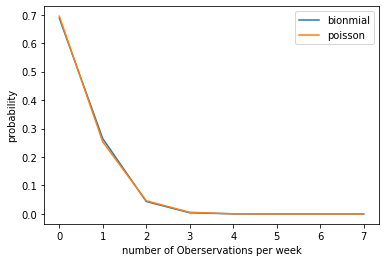

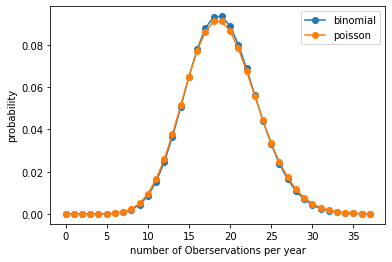

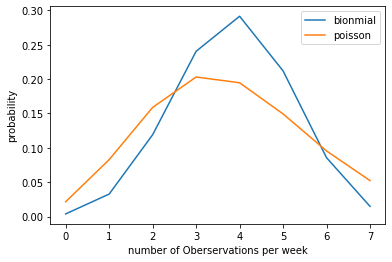

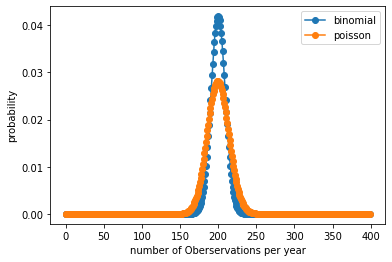

In [8]:
#Lets make a function for plotting
def plotWeekYear(p):
    #Week comparison
    n=7
    k=np.arange(0,n+1)
    binomial_week=stats.binom.pmf(k,n,p)
    poisson_week=stats.poisson.pmf(k,n*p)#note we give lambda=n*p
    plt.plot(k,binomial_week,label="bionmial")
    plt.plot(k,poisson_week,label="poisson")
    plt.xlabel("number of Oberservations per week")
    plt.ylabel("probability")
    plt.legend(loc='upper right')
    plt.show()

    n=365
    k=np.arange(0,2*p*n)
    binomial=stats.binom.pmf(k,n,p)
    poisson=stats.poisson.pmf(k,n*p)
    plt.plot(k,binomial,'o-',label='binomial')
    plt.plot(k,poisson,'o-',label='poisson')
    plt.xlabel("number of Oberservations per year")
    plt.ylabel("probability")
    plt.legend(loc='upper right')
    plt.show()
#First FRBs
p=19/365
plotWeekYear(p)
#Now lets do sunny days
p=200/365
plotWeekYear(p)

So we see that the poisson approximation is really quite good for the case where the $p\ll1$. However, when we the p-value is large and the number of events is small, we can be quite off. Just look at the number of sunny days per week. The binomial distribtuions gives about two percent vs nearly eith percent. This is a dramatic difference. Which one of these is correct for weather? (answer: neither are good because weather from the previous day tells you about the current, its not a random process on the day to day level)

### Challenge question
Compare poisson for gravitational wave observations, how off will you be if you approximate this effect with a poisson? 

binomial: 0.08030128564591586
poisson: 0.06522913800493721


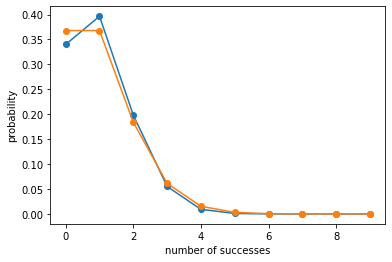

B Mean: 51.999999951448956 Var: 50.1428548141454
P Mean: 51.999999888566 StdDev: 51.9999946511691


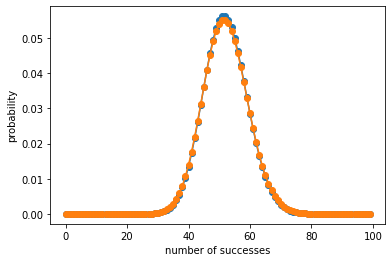

In [9]:
#Answer
#Now with the current rate of Gravitataional wave detection we observe a GW once per week
#What is probability of 3 or mroe graviational waves in one week
#In this case this is the probability of 3 random events happening in a short period of time, since we know 
#One way to phrase this is that the probability of a GW on a day is 1/7 and we hvae 7 days in a week
#What is the probability of 3 or more. The distribtuion for this is
n=7.
p=1./7.
k=np.arange(0,10)
binomial=stats.binom.pmf(k,n,p)
poisson=stats.poisson.pmf(k,n*p)
total1=0
total2=0
for i0 in range(len(k)):
    if k[i0] > 2:
        total1+= poisson[i0]
        total2+= binomial[i0]
        
print("binomial:",total1)
print("poisson:",total2)
plt.plot(k,binomial,'o-')
plt.plot(k,poisson,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()

#now what about for GWs in a year
n=28*52.
p=1/28.
k=np.arange(0,100)
binomial=stats.binom.pmf(k,n,p)
poisson=stats.poisson.pmf(k,n*p)
average  = np.average(k, weights=binomial)
variance = np.average((k-average)**2, weights=binomial)
print("B Mean:",average,"Var:",variance)

average  = np.average(k, weights=poisson)
variance = np.average((k-average)**2, weights=poisson)
print("P Mean:",average,"StdDev:",variance)
plt.plot(k,binomial,'o-')
plt.plot(k,poisson,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()
#This last one is a gaussian 

Now, why are we spending so much time on poisson distribtuions. Lets say I have a distribution that is flat and I sampled from that distribtuion 10000 times, and then made a histogram with 100 bins. Lets make a distribtuion like that? 

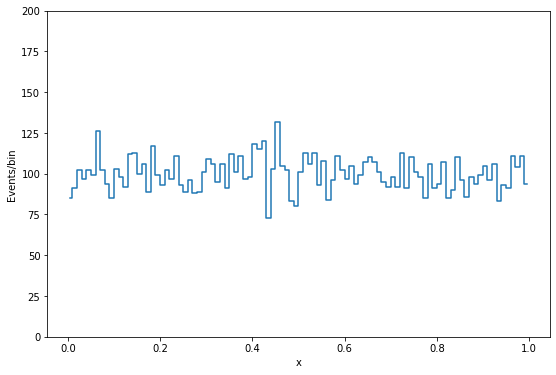

In [10]:
fig, ax = plt.subplots(figsize=(9,6))
N=10000
nbins=100
sample  = np.random.uniform (0,1,N)
histy, bin_edges = np.histogram(sample, bins=nbins)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
ax.set_ylim([0,2*N/nbins])
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')
plt.xlabel("x")
plt.ylabel("Events/bin")
plt.show()

What is the variation of each of these bins? To think about this, each sampling has a 1/100 probability of being in any one of those bins. 

### Challenge question
Plot the mean over the bins. Plot the variations over these bins. What is the distribtuion of the variations over these bins? 


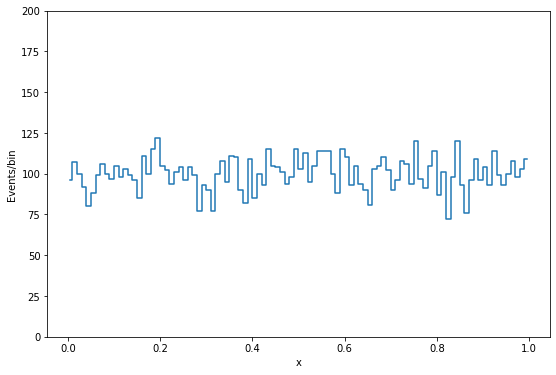

Actual mean: 100.49 Variance: 102.5099
Poisson mean: 99.99934585710345 Variance: 99.96911275895653


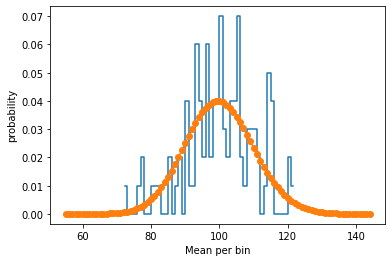

In [11]:
#Solution
#copy and past above distribtuion
fig, ax = plt.subplots(figsize=(9,6))
N=10000
nbins=100
sample  = np.random.uniform (0,1,N)
histy, bin_edges = np.histogram(sample, bins=nbins)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
ax.set_ylim([0,2*N/nbins])
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')
plt.xlabel("x")
plt.ylabel("Events/bin")
plt.show()

#here are the residuals
histy2, bin_edges2 = np.histogram(histy, bins=50)
bin_centers2 = 0.5*(bin_edges2[1:] + bin_edges2[:-1])
plt.plot(bin_centers2,histy2/np.sum(histy2)/(bin_edges2[10]-bin_edges2[9]),drawstyle = 'steps-mid')
haverage  = np.average(bin_centers2, weights=histy2)
hvariance = np.average((bin_centers2-haverage)**2, weights=histy2)
print("Actual mean:",haverage,"Variance:",hvariance)

#Now since we have 100 bins with p=1/100 and we sample 1000 times we have lamb=np= N (1/nbins)
lamb=N/nbins
k=np.arange(0.55*N/nbins,1.45*N/nbins)
poisson=stats.poisson.pmf(k,lamb)
paverage  = np.average(k, weights=poisson)
pvariance = np.average((k-paverage)**2, weights=poisson)
print("Poisson mean:",paverage,"Variance:",pvariance)

plt.plot(k,poisson,'o-')
plt.xlabel("Mean per bin")
plt.ylabel("probability")
plt.show()

Now this brings us to a very important plot. If we have a histogram with $N$ events what are the  fluctuations in that bin? 

If it is poisson, then the Variance is going to be $N$ and the standard deviation is going to be $\sqrt{N}$. As a consquence, we can characterize the fluctuations per bin by the standard deviation. Thus, whenever we have a plot with data and we want to plot the expected fluctuations per bin, we plot the poisson flucutations. The pervious distribution would thus look like. 

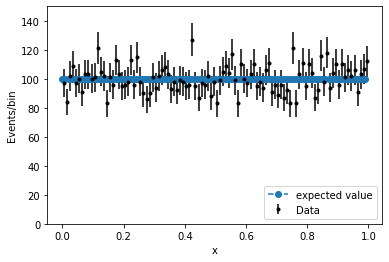

In [12]:
#And so the bins are poisson fluctuated. This is why when we plot data in a histogram we put error bars 
#Corresponding the poission uncertainty in a bin
N=10000
nbins=100
sample  = np.random.uniform (0,1,N)
histy, bin_edges = np.histogram(sample, bins=nbins)
yerr=np.sqrt(histy)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
ax.set_ylim([0,2*N/nbins])
plt.errorbar(bin_centers,histy,yerr=yerr,marker='.',c='black',linestyle = 'None',label='Data')

k=np.arange(0,1,0.01)
vals=np.full((100),N/nbins)
plt.plot(k,vals,'o--',label="expected value")
plt.ylim(0,150)
plt.xlabel("x")
plt.ylabel("Events/bin")
plt.legend(loc='lower right')
plt.show()


## 2.3 Normal(Gaussian) Distribution

The above poissson distribtuion is a very powerful distribution. However, we often view it as a subset of the Normal or Gaussian distribtuion, given by the form : 

\begin{equation}
N(x,\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}

It has the very important properties, that you can derive yourselves: 
\begin{equation}
E[N(x,\mu,\sigma]=\mu \\
V[N(x,\mu,\sigma]=\sigma^2 \\
\end{equation}

It is effectively a poisson distribution where the variance is now not $\lambda$. It is ofen viewed as a generalized version of the poisson distribution. There are many names for this distribtuion. Mathematicians and statistician's often call this the normal distribution. The public frequently refer to this as the bell curve. Physicists call this the Guassian distribution. These notes will refer to it as Gaussian, since Normal can be easily confused (especially with non-native English speakers). 

While the Gaussin distribtuion looks simple, there are several things to notice about it. The most important is that the CDF

\begin{equation}
N(x,\mu,\sigma)=\int_{x}^{\infty} \frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{(u-\mu)^2}{2\sigma^2}} du
\end{equation}

does not have a closed analytic form. In fact, we have to integrate this numerically. Lets run a few checks of this kind. 


In [ ]:
#numerical integration

Now, why is this so important, recall that we derived the sum distribution of two objects. This gave us a triangle distribtuion, what happens when we consider a number that is not just the result of summing two numbers but summing a very large set of numbers. 

Summing: 1  numbers with mean: 4.95724535102855  and std-deviation 2.8899735645775264 2.8620669378553543


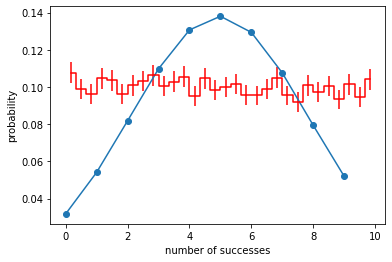

Summing: 2  numbers with mean: 10.078814800163062  and std-deviation 4.067998963895713 4.114658912068451


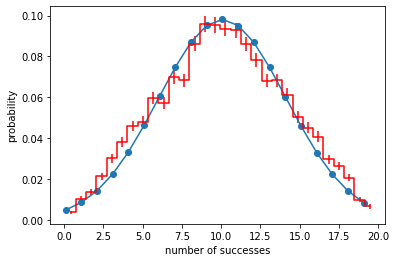

Summing: 3  numbers with mean: 14.95052411160962  and std-deviation 4.9931462932728286 4.983508037203207


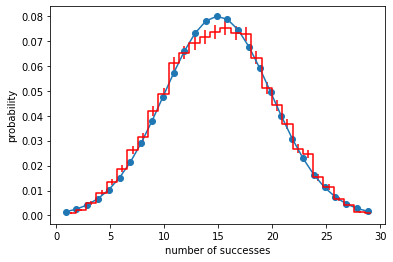

Summing: 4  numbers with mean: 19.91051198890824  and std-deviation 5.82563035660385 5.747669728249722


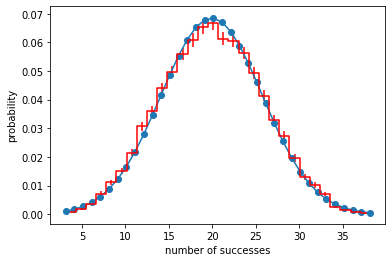

Summing: 50  numbers with mean: 249.89129469243642  and std-deviation 20.50620939964182 20.403538771997717


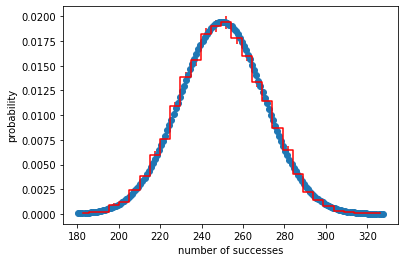

Summing: 5000  numbers with mean: 25000.04058034873  and std-deviation 203.2573576937014 204.1244765690914


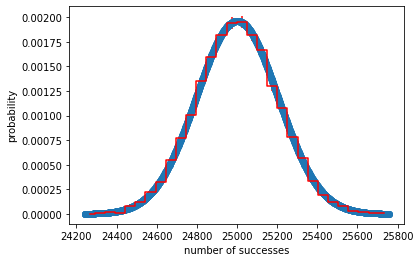

In [14]:
import math

def normhist(iVars,iNbins=30):
    y0, bin_edges = np.histogram(iVars, bins=iNbins)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    norm0=len(iVars)*(bin_edges[-1]-bin_edges[0])/iNbins
    plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,drawstyle = 'steps-mid',c='red')
    return bin_edges

def plotSum(iN):
    ntoys=10000
    sums=np.array([])
    for i0 in range(ntoys):
        pToy = np.random.uniform(0,10,iN)
        sums = np.append(sums,pToy.sum())
    binrange=normhist(sums)
    k=np.arange(binrange[0],binrange[-1])
    normal=stats.norm.pdf(k,sums.mean(),sums.std())
    plt.plot(k,normal,'o-')
    plt.xlabel("number of successes")
    plt.ylabel("probability")
    print("Summing:",iN," numbers with mean:",sums.mean()," and std-deviation",sums.std(),sums.mean()/math.sqrt(3*iN))
    plt.show()

plotSum(1)
plotSum(2)
plotSum(3)
plotSum(4)
plotSum(50)
plotSum(5000)

So the sum of random numbers becomes a gaussian with a mean distribtuion incidently the Variance of a flat distribution is the range$/\sqrt{12}$. To see this, lets compute it 
\begin{eqnarray}
V[x]&=&\int_{a}^{b}\frac{1}{b-a}\left(x-\frac{b-a}{2}\right)^2 dx\\
V[x]&=&\int_{-a^\prime}^{a^\prime}\frac{1}{2a^\prime}\left(x\right)^2 dx\\
V[x]&=&\frac{1}{2a^\prime}\frac{1}{3}\left(x\right)^3|_{-a^\prime}^{a^\prime} \\
V[x]&=&\frac{2a^3\prime}{2a^\prime}\frac{1}{3} \\
V[x]&=&\frac{\left(\frac{b-a}{2}\right)^2}{3} \\
V[x]&=&\frac{\left(b-a\right)^2}{12} \\
\end{eqnarray}
So the RMS of N random variables summed up we have the variance is given by just multiplying by $N$. Further noting that the average of $N$ summed variables gives $\bar{x}=\frac{b-a}{2}$. Combining all of this, we have: 
\begin{eqnarray}
V[x_1+x_2+...+x_N]&=& N \frac{\left(b-a\right)^2}{12}\\
V[x_1+x_2+...+x_N]&=& N \frac{\bar{x}^2}{3}\\
\end{eqnarray}
This is why we can calculate the standard deviation of our sample using the above formula. In any case, we will take this demo as a proof by demo of what we call **the cental limit theorem** which states that **any distribution composed of inputs from a large number of continuous random varibles, the sum tends to a guassian**. For fun, outside of class, go ahead and derive it. Lets compare the gaussian with a poisson distribution, so we can connect all of our friends together. 

### Challenge Question
Compare the poission distribution against a normal distribution for $\lambda$=3,15,100. How do these distribtuions vary? 

Show that the sum of two gaussian distribtuion is also gaussian, what is its variance? 

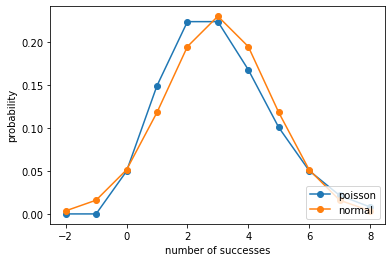

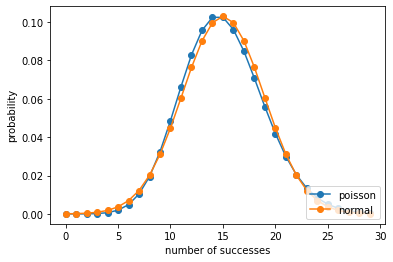

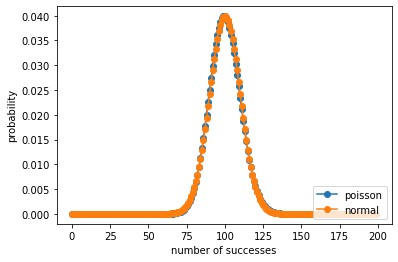

In [15]:
#solution 1
##### Lets plot a gaussian and poisson with same mean and RMS
n=3
lamb=n
k=np.arange(-2,3.0*n)
poisson=stats.poisson.pmf(k,lamb)
normal=stats.norm.pdf(k,n,math.sqrt(n))
plt.plot(k,poisson,'o-',label='poisson')
plt.plot(k,normal,'o-',label='normal')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.legend(loc='lower right')
plt.show()

n=15
lamb=n
k=np.arange(0,2.0*n)
poisson=stats.poisson.pmf(k,lamb)
normal=stats.norm.pdf(k,n,math.sqrt(n))
plt.plot(k,poisson,'o-',label='poisson')
plt.plot(k,normal,'o-',label='normal')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.legend(loc='lower right')
plt.show()

n=100
lamb=n
k=np.arange(0,2.0*n)
poisson=stats.poisson.pmf(k,lamb)
normal=stats.norm.pdf(k,n,math.sqrt(n))
plt.plot(k,poisson,'o-',label='poisson')
plt.plot(k,normal,'o-',label='normal')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.legend(loc='lower right')
plt.show()

Summing: 2, numbers with mean: 0.0074330830588580695  and std-deviation 1.4110097781638475


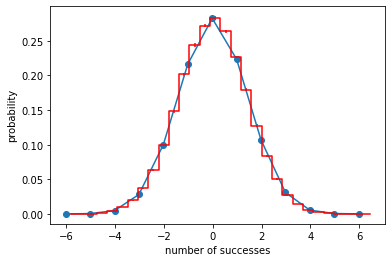

In [16]:
#Generate 2 gaussian and sum 
ntoys=100000
sums=np.array([])
for i0 in range(ntoys):
    pToy = np.random.normal(0,1,2)
    sums = np.append(sums,pToy.sum())
binrange=normhist(sums)
k=np.arange(binrange[0],binrange[-1])
normal=stats.norm.pdf(k,sums.mean(),sums.std())
plt.plot(k,normal,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
print("Summing: 2, numbers with mean:",sums.mean()," and std-deviation",sums.std())
plt.show()
#we expect a standard deviation of sqrt(2), this follows from Var(x1+x2)=N Var(x)


<!--start-block-->
<hr style="height: 1px;">

## 2.4 Uncertainties in measurement

In the previous class, we defined what the expectation and variance of a sampled distribtuion are. However, we did not delve into the concept of what we are sampling. In reality, when we perform a measurement we are are just sampling from an unkown distribution, or worse yet, we are sampling from an unknown distribution and then distorting that distribution with some sort of effect. Lets see how this goes, by going through the concept of what a measurement is. 

Lets say that you are sampling a distribution that is fundamentally a guassian. For example, we can consider a sum of random numbers. Now once we sample from this distribution, we then distort this distribution by a function $f(x)$ that will modify these events, such a function could be what happens when we send a particle in a magnetic field, or when light reflects off a mirror, it could be any function. The question is how does this shape or original $x$ that is gaussian distributed. 

To see that consider then case when the probaility of the input distribution is $p(x)$. If we define $x^{\prime}=f(x)$,  the probability to be in small region $dx^\prime$ of the modified coordinates is defined by 
\begin{eqnarray}
p^{\prime}(x^\prime)dx^\prime&=&f(p(x))dx^\prime \\
                             &=&f(p(x))\frac{dx^\prime}{dx}dx\\
                             &=&f(p(x))\frac{df}{dx}dx\\
\end{eqnarray}
This follows from the fact that the spread of a function sampled from $p(x)$ would be modified by the spread of $f(x)$ defined as  $f(x+\Delta x)-f(x)\approx\frac{df}{dx}\Delta x$. 

As a simple exmaple, in the case of $f(x)=x^{2}$ or $\frac{df}{dx}=2x$. What that means is that if $\sigma_{f(x)}\approx2x\sigma_{x}$. Lets actually see that emperically.

<br>
<!--end-block-->


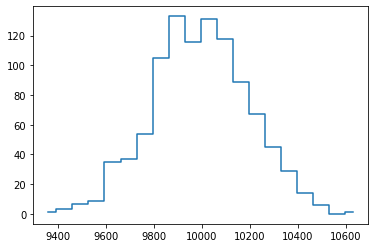

Mean: 9995.415458864549 Stddeviation: 199.9807153949371
Predicted Mean: 10000 Stddeviation: 200


In [17]:
#Now lets say we do a measurement, and the measurement takes an input variable that is varying, 
#and applies a function to it. What is the spread of the function
ntries=1000
meas = np.full(ntries,100) #The value 100, 10k times
unc  = np.random.normal (0,1, ntries) #a randomly sampled value from a gaussian with width 1 10k times
meas = meas+unc
def function(ix):#note the norm is for 100 bins over 0-20
    return ix**2
    if ix < 0:
        return -ix**2
    else:
        return ix**2
outmeas = np.array(list(map(function, meas)))
histy, bin_edges = np.histogram(outmeas, bins=20)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')
plt.show()

print("Mean:",outmeas.mean(),"Stddeviation:",outmeas.std())
print("Predicted Mean:",function(100),"Stddeviation:",2*100)

Now what about if we have two uncertainties? This is a little bit different in the sense that these variations are independent of each other. Lets consider the very simple function $f(x)=x$, now lets say that $x$ can vary by a gaussian distributed variable $\sigma_1$ and a second gaussian distributed variable $\sigma_2$. If we consider these variations, we have that $f(x)$ will be modified by
\begin{equation}
 f(x) = x + \sigma_1 + \sigma_2
\end{equation}
This will give us two gaussians. If we look to see the variance of this distribution, we can treat these two fluctuations as two independent measurements, which means we can write. 
\begin{eqnarray}
 \rm{Var}[f(x)] &=& \rm{Var}(x) + \rm{Var}(\sigma_1) + \rm{Var}(\sigma_2)\\
                &=& \sigma_1^2 + \sigma_2^2 
\end{eqnarray}

To visualize what is going on, we can imagine plotting these variations in a 2D plot. 


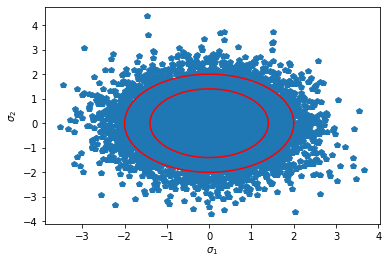

In [18]:
ntoys=10000
err1=np.array([])
err2=np.array([])
for i0 in range(ntoys):
    pToy = np.random.normal(0,1,2)
    err1 = np.append(pToy[0],err1)
    err2 = np.append(pToy[1],err2)
angle = np.linspace( 0 , 2 * np.pi , 150 ) 
radius = 1*1.4
x = radius * np.cos( angle ) 
y = radius * np.sin( angle ) 
radius = 1*2.0
x2 = radius * np.cos( angle ) 
y2 = radius * np.sin( angle ) 
plt.plot(err1,err2,"p")
plt.plot(x,y,c='r')
plt.plot(x2,y2,c='r')
plt.xlabel("$\sigma_{1}$")
plt.ylabel("$\sigma_{2}$")
plt.show()

Sampling two gaussians gives us a circular distribution with a width given by the radius of the circle. This radius, can be seen to be the standard deviation of $f(x)$ or the $\sqrt{\rm{Var}[f(x)]}=\sqrt{\sigma_1^2+\sigma_2^2}$, or in otherwords sampling two independent variables the variations add as if they are two separate independent coordinates. This is often denoted as a "Sum in Quadrature". 



## 2.5 Propagating uncertainties in Data (a realistic example)

Very famously there was an excess of events at the Tevatron collider in fermilab. This excess caused a lot of excitement. However many people were skeptical. [Here](https://www.science20.com/quantum_diaries_survivor/no_jetjet_bump_new_cdf_diboson_analysis-123327) is a full description of what was going on. However, I would like ot highight this plot here: 
<img src="http://www.pd.infn.it/~dorigo/wjjcdf73fb.jpg" width="300"/>

that people thought was giving a bump for a new particle.  The way this works is that we take data, the points. Then we build a simulation of all the other processes that we know are occurring we we sum them up. This is what constitutes the solid distribtuions, with the different colors representing their relative contribtuions. Finally, we subtract the data and the solid distribtuion, and we get a deviation. The fact that this deviation corresponds to a bump makes us think this is a new particle. The problem with this bump is that its a bump on a falling distribution. So what would happen if our predicted distribtuion was shifted to the right by a little bit, how would the bump look?

To see this, lets open a file with this data and try to shift it ourselves. 

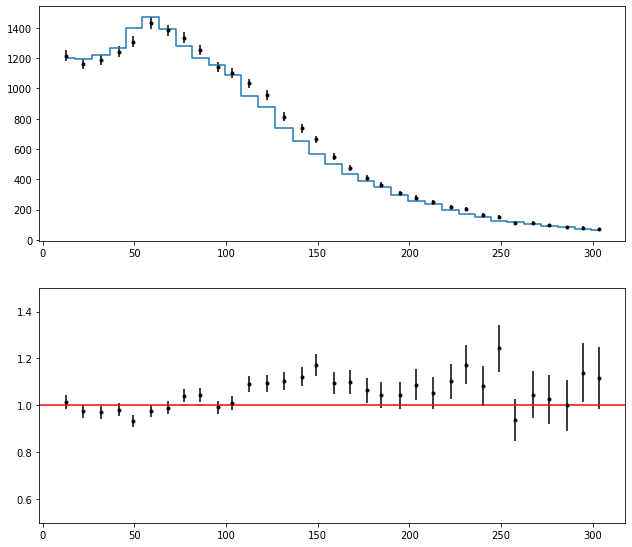

In [21]:
import csv
#to do: histogram of dijet mass plot
def load(iName):
    label=iName
    datax=np.array([])
    datay=np.array([])
    datayerr=np.array([])
    with open(label,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter=',')
        for row in plots:
            datax    = np.append(datax,float(row[0]))
            datay    = np.append(datay,float(row[1]))
            datayerr = np.append(datayerr,np.sqrt(float(row[1])))
    return datax,datay,datayerr

def histratio(iydata,iyderr,iysim):
    newydata=np.array([])
    newyderr=np.array([])
    for i0 in range(len(iysim)):
        ynew=iydata[i0]/iysim[i0]
        yner=iyderr[i0]/iysim[i0]
        newydata=np.append(newydata,ynew)
        newyderr=np.append(newyderr,yner)
    return newydata,newyderr

fig = plt.figure(figsize=(10.5, 9.5))
ax = fig.add_subplot(2,1,1)
datax,datay,datayerr=load("tmpdata.txt")
simx,simy,simyerr=load("tmpmc.txt")
plt.errorbar(datax,datay,yerr=datayerr,marker='.',c='black',linestyle = 'None')
plt.plot    (datax,simy,drawstyle = 'steps-mid')
ax = fig.add_subplot(2,1,2)
yrdata,yrderr=histratio(datay,datayerr,simy)
ax.errorbar(datax,yrdata,yerr=yrderr,marker='.',c='black',linestyle = 'None')
ax.axhline(1, c='red')
ax.set_ylim(0.5,1.5)
plt.show()


<!--start-block-->

Now we can define a shift a histogram by just shuffling events in bins. This we do by 
\begin{align*}
f(x^{\prime}) & =f(x+\sigma)\approx f(x)+\frac{df}{dx}\sigma\\
 & =f(x)+\frac{f(x+\Delta x)-f(x)}{\Delta x}\sigma\\
 & =f(x)\left(1-\frac{\sigma}{\Delta x}\right)+f(x+\Delta x)\frac{\sigma}{\Delta x}
\end{align*}
Which we can rewrite in terms of bin shifts with a fractional uncertainty of $f$ this gives us
\begin{equation}
\rm{bin_{i}} = (1-f)\rm{bin}_{i} + f \rm{bin}_{i-1} \\
f(x_{i}) = f(x_{i})(1-f)+f(x-\Delta x)f
\end{equation}

Lets add this modification and see if a fractional shift can explain our deviation. 

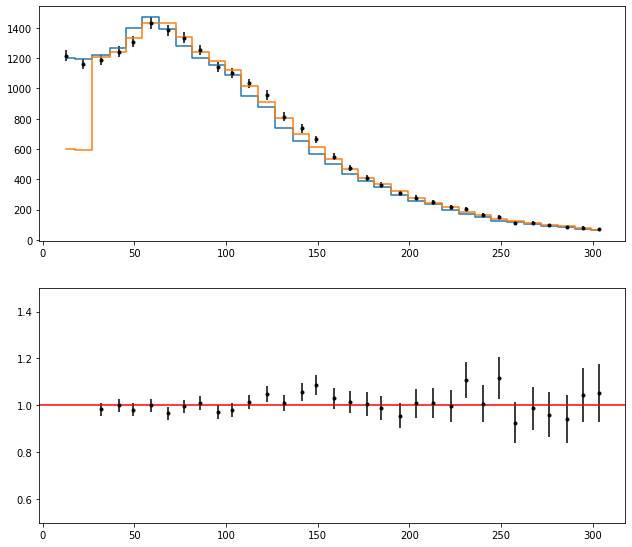

In [22]:
#Now lets shift sthe bins of the simulatino by a fraction
def shifthist(ixunc,isimy):
    newsimy=np.array([])
    for i0 in range(len(isimy)):
        ynew = isimy[i0]*(1-ixunc)
        if i0 > 1:
            ynew = isimy[i0-1]*ixunc + isimy[i0]*(1-ixunc)
        newsimy=np.append(newsimy,ynew)
    return newsimy

def histratio(iydata,iyderr,iysim):
    newydata=np.array([])
    newyderr=np.array([])
    for i0 in range(len(iysim)):
        ynew=iydata[i0]/iysim[i0]
        yner=iyderr[i0]/iysim[i0]
        newydata=np.append(newydata,ynew)
        newyderr=np.append(newyderr,yner)
    return newydata,newyderr
    
        
fig = plt.figure(figsize=(10.5, 9.5))
ax = fig.add_subplot(2,1,1)
newsimy=shifthist(0.5,simy)
plt.errorbar(datax,datay,yerr=datayerr,marker='.',c='black',linestyle = 'None')
plt.plot    (datax,simy,drawstyle = 'steps-mid')
plt.plot    (datax,newsimy,drawstyle = 'steps-mid')

ax = fig.add_subplot(2,1,2)
yrdata,yrderr=histratio(datay,datayerr,newsimy)
ax.errorbar(datax,yrdata,yerr=yrderr,marker='.',c='black',linestyle = 'None')
ax.axhline(1, c='red')
ax.set_ylim(0.5,1.5)
plt.show()

So a fractional shift of half the bin size is sufficient to explain this effect. Do you believe it is real?